In [7]:
cd ..

/Users/smoon2/Desktop/CMU/Fall25/11755-MLSP/FinalProject/MLSP_Fall25_Project


In [13]:
import numpy as np
import pandas as pd
import soundfile as sf
import matplotlib.pyplot as plt
from mir_eval.separation import bss_eval_sources

from utils import load_and_preprocess

In [8]:
gt_vocal_path = 'data/vocal_trimmed.wav'
gt_inst_path = 'data/inst_trimmed.wav'

est_vocal_paths = [
    'output/ICA/component_1_vocal.wav',
    'output/NMF/component_1_vocal.wav',
]
est_inst_paths = [
    'output/ICA/component_0_inst.wav',
    'output/NMF/component_0_inst.wav',
]

In [9]:
sr, gt_vocal, gt_inst, est_vocals, est_insts = load_and_preprocess(
    gt_vocal_path, gt_inst_path, est_vocal_paths, est_inst_paths
)

[GT] Sample rate: 44100, Vocal len: 2293628, Inst len: 2293628
Loading estimated vocal: output/ICA/component_1_vocal.wav, instrumental: output/ICA/component_0_inst.wav ...
[Est] Sample rate: 44100, Vocal len: 2245568, Inst len: 2245568
Loading estimated vocal: output/NMF/component_1_vocal.wav, instrumental: output/NMF/component_0_inst.wav ...
[Est] Sample rate: 44100, Vocal len: 2245120, Inst len: 2245120
Common sample rate: 44100, common length: 2245120


In [22]:
import warnings
warnings.filterwarnings("ignore")
methods = ['ICA', 'NMF']
rows = []

for i, (est_vocal, est_inst) in enumerate(zip(est_vocals, est_insts)):

    # Compute metrics
    SDR_v, SIR_v, SAR_v, _ = bss_eval_sources(
        gt_vocal, est_vocal
    )

    SDR_i, SIR_i, SAR_i, _ = bss_eval_sources(
        gt_inst, est_inst
    )
    rows.append({'Method': methods[i], 'Source': 'Vocal', 'SDR': SDR_v[0], 'SAR': SAR_v[0], 'SIR': SIR_v[0]})
    rows.append({'Method': methods[i], 'Source': 'Instrumental', 'SDR': SDR_i[0], 'SAR': SAR_i[0], 'SIR': SIR_i[0]})

    print(f"Method: {methods[i]}")
    print(f"  Vocal  : SDR={SDR_v[0]:.2f}, SIR={SIR_v[0]:.2f}, SAR={SAR_v[0]:.2f}")
    print(f"  Instr. : SDR={SDR_i[0]:.2f}, SIR={SIR_i[0]:.2f}, SAR={SAR_i[0]:.2f}")

df_results = pd.DataFrame(rows)

Method: ICA
  Vocal  : SDR=-7.41, SIR=inf, SAR=-7.41
  Instr. : SDR=-20.41, SIR=inf, SAR=-20.41
Method: NMF
  Vocal  : SDR=-6.67, SIR=inf, SAR=-6.67
  Instr. : SDR=-18.52, SIR=inf, SAR=-18.52


In [23]:
df_results

,Method,Source,SDR,SAR,SIR
0,ICA,Vocal,-7.407243,-7.407243,inf
1,ICA,Instrumental,-20.413093,-20.413093,inf
2,NMF,Vocal,-6.667844,-6.667844,inf
3,NMF,Instrumental,-18.519472,-18.519472,inf


In [18]:
df_results.drop(columns=['SIR'], inplace=True)

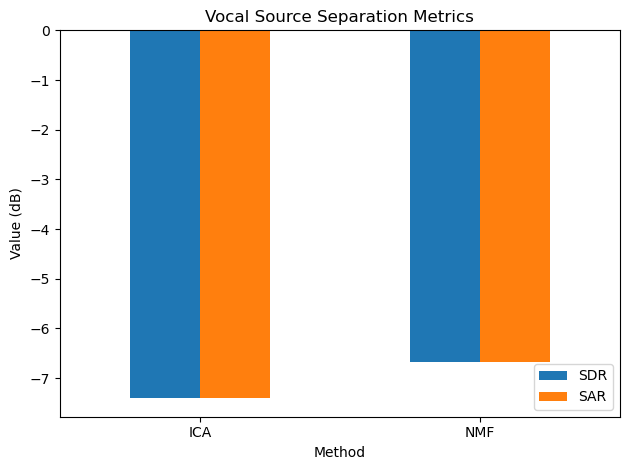

In [20]:
ax = df_results[df_results['Source'] == 'Vocal'].plot.bar(x='Method', y=['SDR', 'SAR'], title='Vocal Source Separation Metrics', ylabel='Value (dB)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

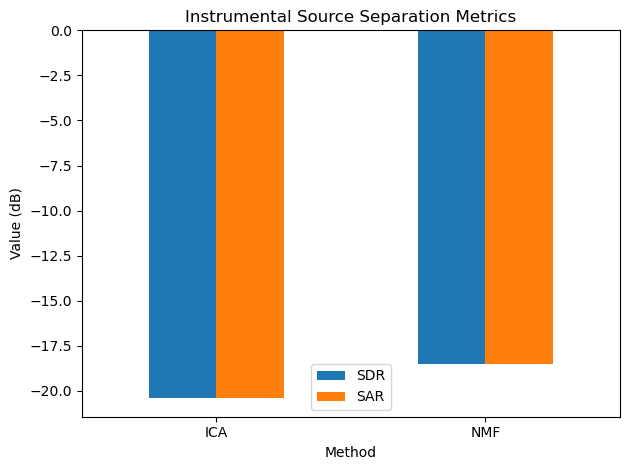

In [24]:
ax = df_results[df_results['Source'] == 'Instrumental'].plot.bar(x='Method', y=['SDR', 'SAR'], title='Instrumental Source Separation Metrics', ylabel='Value (dB)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()